MAE: 68.5549151414144
RMSE: 78.79798394618857
R2 Score: -0.09982363614165224


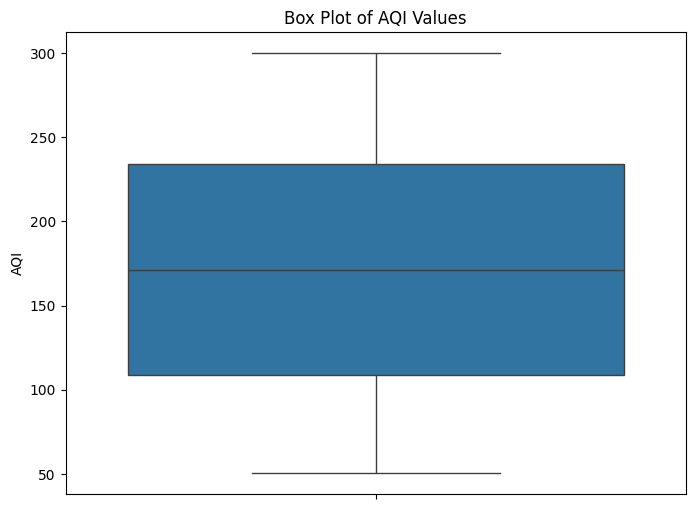

In [1]:
# -*- coding: utf-8 -*-
"""Another copy of Untitled4.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1cC9fjpVLZHsi8SXtUUhGHCRYh7hyQNq9
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Generate synthetic dataset
data = {
    'PM2.5': np.random.uniform(10, 200, 1000),
    'PM10': np.random.uniform(20, 300, 1000),
    'NO2': np.random.uniform(5, 150, 1000),
    'CO': np.random.uniform(0.1, 5, 1000),
    'Traffic Volume': np.random.uniform(500, 5000, 1000),
    'Temperature': np.random.uniform(10, 40, 1000),
    'Humidity': np.random.uniform(20, 90, 1000),
    'Wind Speed': np.random.uniform(0, 15, 1000),
    'AQI': np.random.uniform(50, 300, 1000)
}

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('/content/air_quality_data (4).csv', index=False)

# Load dataset
df = pd.read_csv('/content/air_quality_data (4).csv')

# Split data into features and target
X = df.drop(columns=['AQI'])
y = df['AQI']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

# Box plot for AQI distribution
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['AQI'])
plt.title('Box Plot of AQI Values')
plt.ylabel('AQI')
plt.show()